![visioncolab](https://drive.google.com/uc?export=view&id=10UMKqKSnU2grmitxYxvL7V6GVMu8RrpP)


`Google colab's for image processing, pattern recognition and computer vision`

[Domingo Mery](https://domingomery.ing.puc.cl/) - Department of Computer Science - Universidad Católica de Chile

# Loading and displaying color images

## Download onto Google Colab

In [3]:
!wget https://www.dropbox.com/s/do6b49d10ty1dyf/frutos_rojos.png

--2024-08-21 15:46:20--  https://www.dropbox.com/s/do6b49d10ty1dyf/frutos_rojos.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601f:18::a27d:912
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/matphwqhnd7rw8daxdnxc/frutos_rojos.png?rlkey=srmhn7v96ddelsu98i283qwlw [following]
--2024-08-21 15:46:21--  https://www.dropbox.com/scl/fi/matphwqhnd7rw8daxdnxc/frutos_rojos.png?rlkey=srmhn7v96ddelsu98i283qwlw
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb091a5657d1134b12eee245b54.dl.dropboxusercontent.com/cd/0/inline/CZEx3Sv8yAqeUxDikfaglZYsAQ4V3BgmsGDOv8x4v2X4RUMnB-9ZdU12h7eAvY-nbrxlah8Fk9G9HSjBPPnFf8sH7B03-eQ2QSCKp51fJnQdadQRL0ZIOmW4X7H_NLxTtzQ/file# [following]
--2024-08-21 15:46:21--  https://ucb091a5657d1134b12eee245b54.dl.dropboxusercontent.com/cd/0/inline/CZEx3Sv8yA

#OpenCV

In [4]:
import cv2
from google.colab.patches import cv2_imshow

OpenCV uses BGR image format. So, when we read an image using cv2.imread() it interprets in BGR format by default. [See more](https://www.geeksforgeeks.org/convert-bgr-and-rgb-with-python-opencv/)


OpenCV reads in images in BGR format (instead of RGB) because when OpenCV was first being developed, BGR color format was popular among camera manufacturers and image software providers. [See more](https://stackoverflow.com/questions/14556545/why-opencv-using-bgr-colour-space-instead-of-rgb)


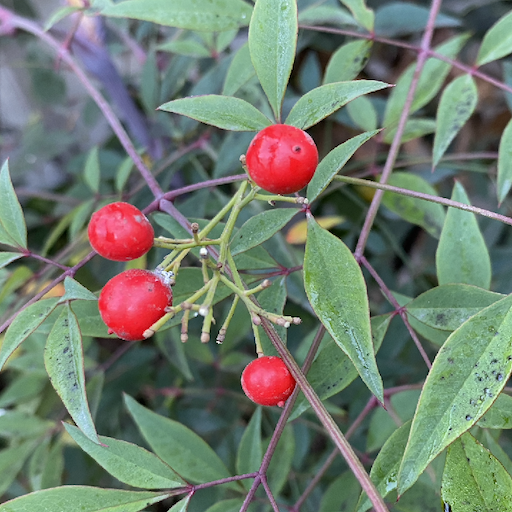

In [5]:
X = cv2.imread('frutos_rojos.png')
cv2_imshow(X)

## Channels

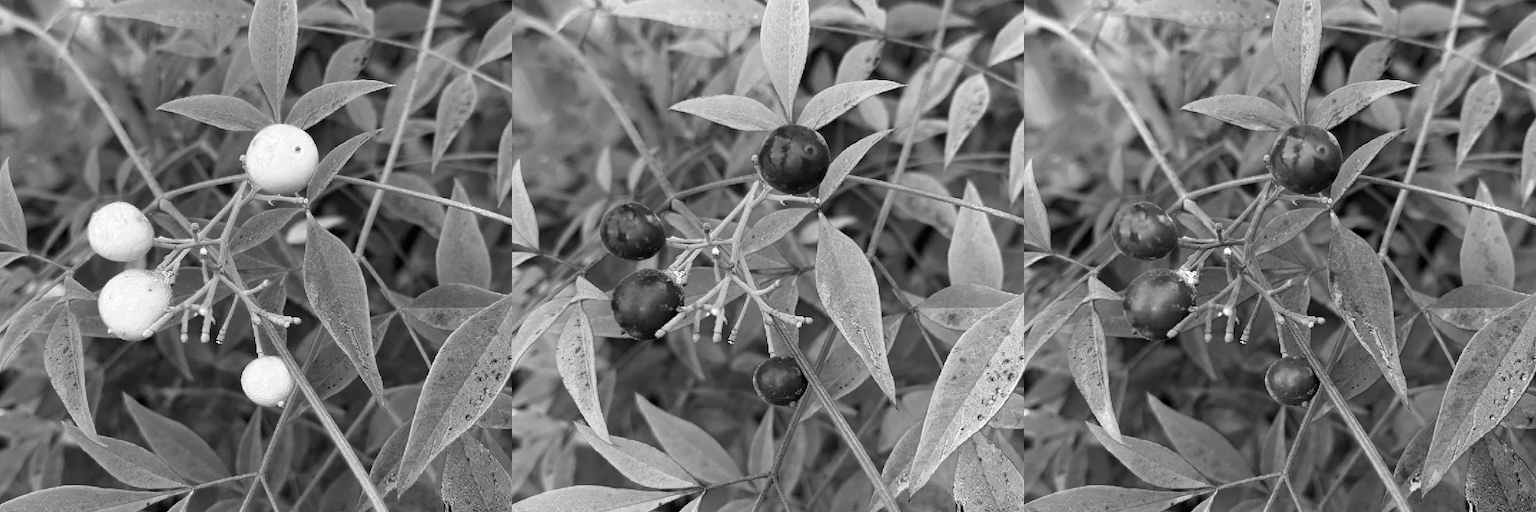

In [9]:
import numpy as np
# Blue channel
B = X[:,:,0]

# Green channel
G = X[:,:,1]

R = X[:,:,2]

I = X[:,:,[2,1,0]]

RGB = np.concatenate((R,G,B),axis=1)
cv2_imshow(RGB)


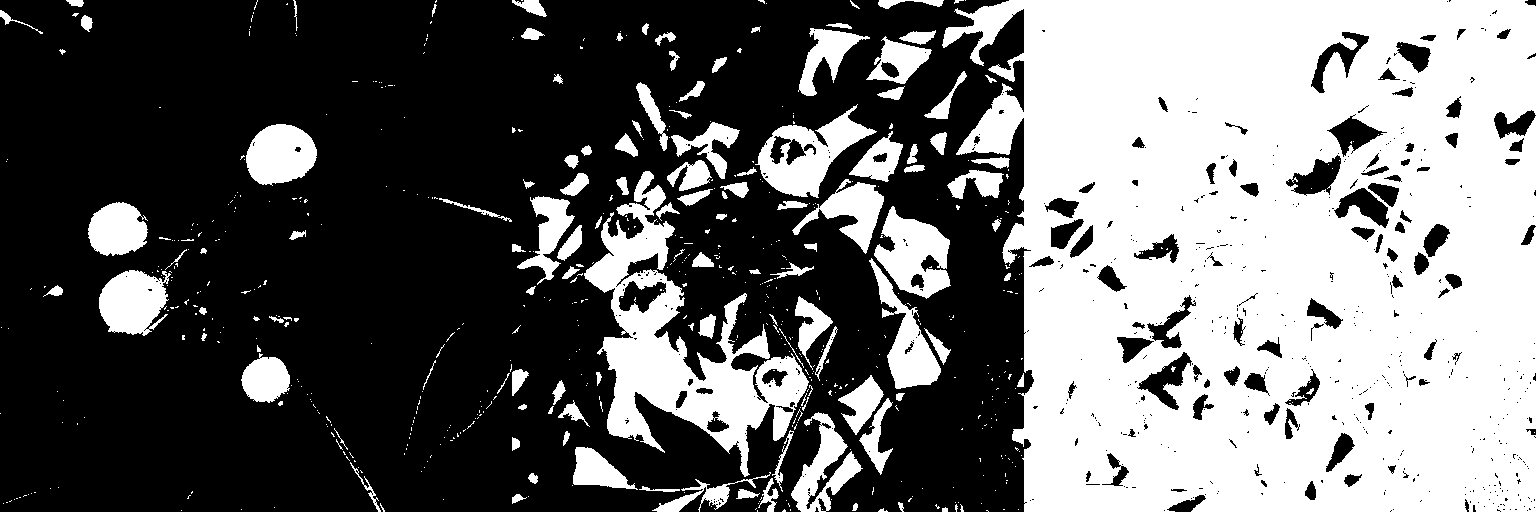

In [23]:
Sr = R>200
Sg = G<90
Sb = B>50
Srgb = np.concatenate((Sr,Sg,Sb),axis=1)
cv2_imshow(Srgb*255)

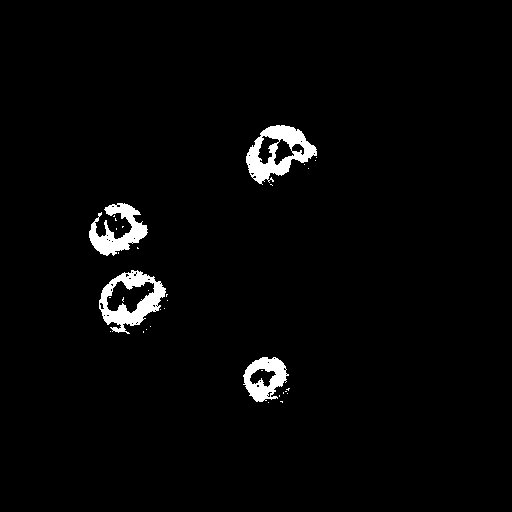

In [39]:
Srg = np.logical_and(Sr,Sg)
S   = np.logical_and(Srg,Sb) # aquí estamos concatenando las imágenes, las sumamos
cv2_imshow(S*255)

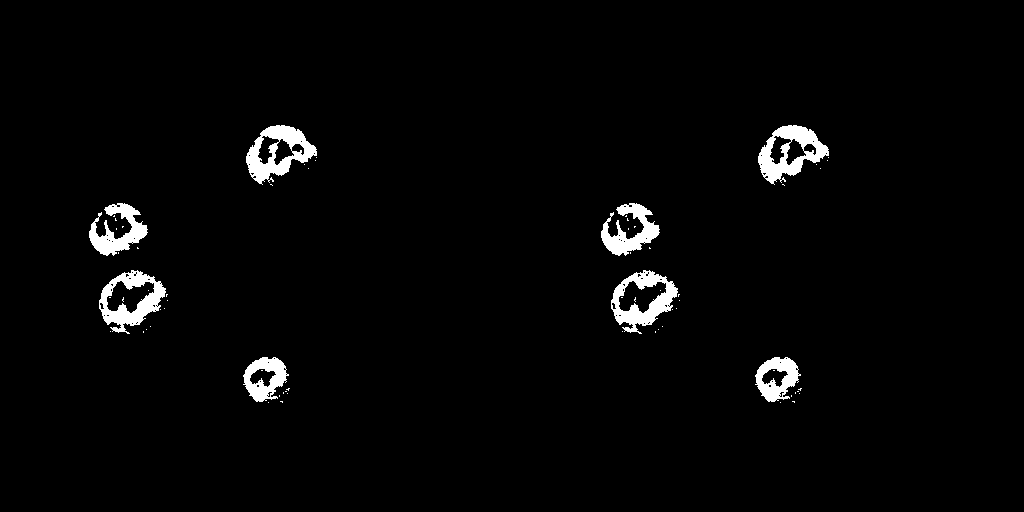

In [43]:
(N,M) = S.shape
Q = S
for i in range(N):
  interior = False
  for j in range(M):
      if Q[i, j] == 255:
          if not interior:
              Q[i, j+1] = 255
      interior = True

SQ = np.concatenate((S, Q),axis=1)
cv2_imshow(SQ*255)